In [300]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from tensorflow.keras.models import load_model

In [301]:
def make_predictions(model, sales_and_spend, window_size =360, predict_days=None):
    future_sales = np.zeros((predict_days, 2))  # Initialize array to store predicted values
    x_input_predict = sales_and_spend[-window_size:]
    
    for i in range(predict_days):
        x_input_predict = x_input_predict.reshape((1, window_size, 2))  # Reshape input data for model
        prediction = model.predict(x_input_predict)  # Make prediction
        future_sales[i] = prediction  # Store predicted values
        x_input_predict = np.roll(x_input_predict, -1)  # Roll input data to make next prediction
        x_input_predict[:, -1, :] = prediction  # Update input data with predicted values

    return future_sales

In [302]:
def plot_predictions(dates, sales_and_spend, future_dates, future_sales_and_spend):
    fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    
    # Plot historical data
    ax[0].plot(dates, sales_and_spend[:, 0], label='Data Sales')
    ax[0].set_title('Validation Data Prediction for Sales')
    ax[0].set_ylabel('Total Sales')
    ax[0].legend()

    ax[1].plot(dates, sales_and_spend[:, 1], label='Data Spend')
    ax[1].set_title('Validation Data Prediction for Spend')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Total Spend')
    ax[1].legend()
    
    # Plot future predictions
    ax[0].plot(future_dates, future_sales_and_spend[:, 0], label='Sales Prediction')
    ax[0].legend()
    ax[1].plot(future_dates, future_sales_and_spend[:, 1], label='Spend Prediction')
    ax[1].legend()
    
    plt.tight_layout()
    plt.show()

In [303]:
def forecast_future(dates, total_sales, total_spend, model_path, predict_days=30, window_size=360, batch_size=32):
    # Prepare data
    sales_and_spend = np.column_stack((total_sales, total_spend))
    
    # Load model
    model = load_model(model_path)
    
    # Prepare data for future predictions
    max_date = pd.to_datetime(dates[-1]).to_pydatetime()
    future_dates = [max_date + timedelta(days=i) for i in range(predict_days)]
    
    # Make predictions
    future_sales = make_predictions(model, sales_and_spend, window_size, predict_days)
    
    # Plot results
    plot_predictions(dates, sales_and_spend, future_dates, future_sales)

In [304]:
df = pd.read_csv('../Dataset/dummy_dataset_small.csv')
df['Date'] = pd.to_datetime(df['Date'])
dates = df['Date'].to_numpy()
sales_series = df['Total Sales'].to_numpy()
spend_series = df['Total Spend'].to_numpy()

1/1 [==============================] - 0s 13ms/step


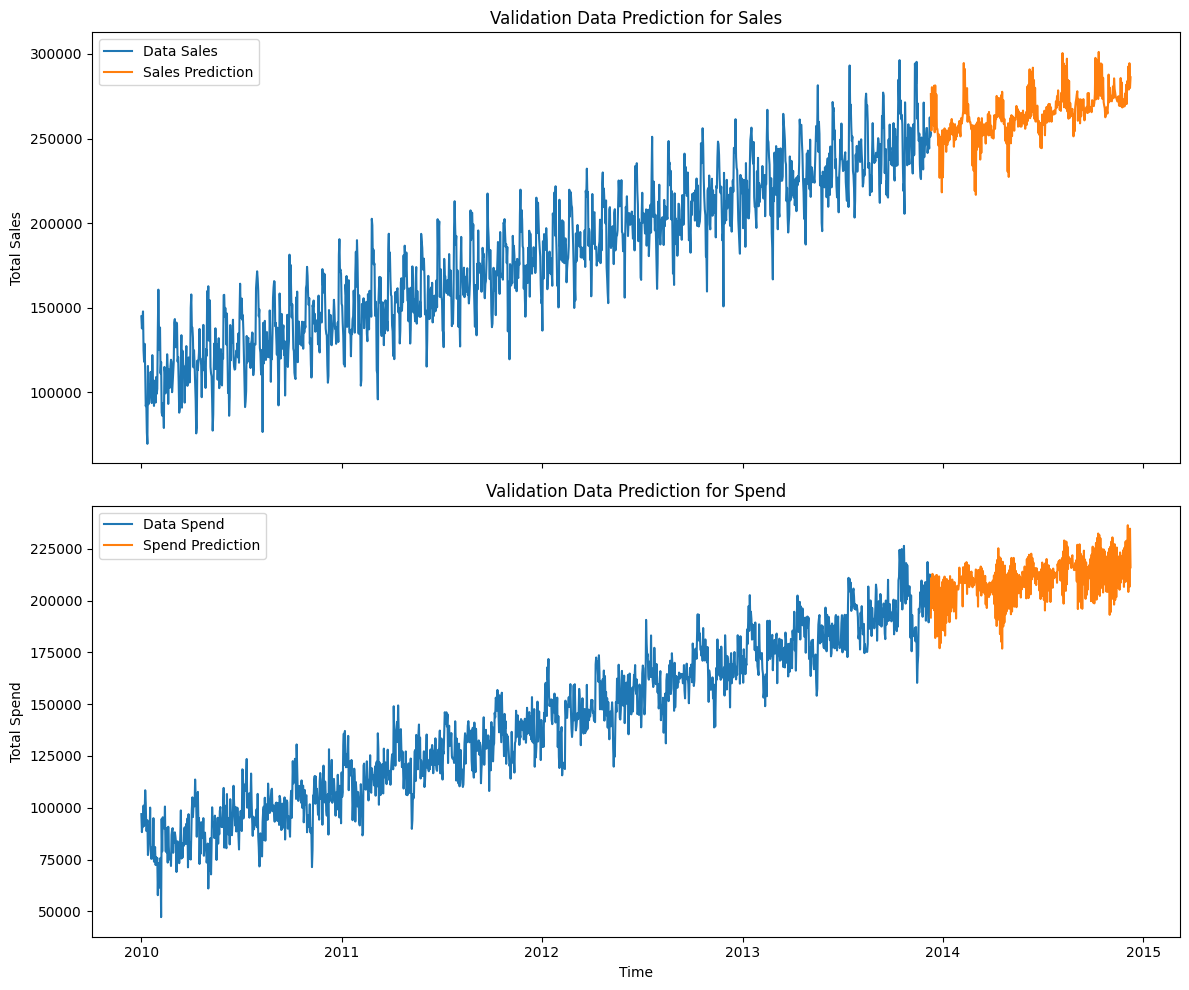

In [305]:
forecast_future(
    dates=dates,
    total_sales=sales_series,
    total_spend=spend_series,
    model_path='../ModelResult/dummy_dataset.h5',
    predict_days=365
)

In [306]:
# df = pd.read_csv('../Dataset/dummy_dataset.csv')

In [307]:
# # INPUT INPUT INPUT INPUT INPUT INPUT INPUT INPUT INPUT INPUT INPUT INPUT INPUT INPUT

# DATES = pd.to_datetime(df['Date']).to_numpy()

# SALES_SERIES = df['Total Sales'].to_numpy()

# SPEND_SERIES = df['Total Spend'].to_numpy()

# MODEL_PATH='../ModelResult/dummy_dataset.h5'

# PREDICT_DAYS = 30

# DATES.dtype

In [308]:
# model = load_model(MODEL_PATH)

# sales_and_spend = np.column_stack((SALES_SERIES, SPEND_SERIES))

# # Cuma buat ngecek, dapat diabaikan
# sales_and_spend.shape
# print(sales_and_spend)

In [309]:
# # Fungsi untuk prediksi penjualan (sales) dan pengeluaran (spend)

# def make_predictions(model, sales_and_spend, window_size =360, predict_days=None):
#     future_sales_and_spend = np.zeros((predict_days, 2))  # Initialize array to store predicted values
#     x_input_predict = sales_and_spend[-window_size:]
    
#     for i in range(predict_days):
        
#         # Misalkan data x_input_predict adalah [1, 3, 5, 7]
#         x_input_predict = x_input_predict.reshape((1, window_size, 2))  # Reshape input data for model
        
#         # Misalkan hasil prediksinyan adalah 9
#         prediction = model.predict(x_input_predict)  # Make prediction
        
#         future_sales_and_spend[i] = prediction  # Store predicted values
        
#         # Remove the first data pada x_input_predict, menjadi [3, 5, 7]
#         x_input_predict = np.roll(x_input_predict, -1)  
        
#         # Update x_input_data dengna hasil prediksi sebelumnya (9), menjadi [3, 5, 7, 9]
#         x_input_predict[:, -1, :] = prediction  
    
#     return future_sales_and_spend

# future_sales_and_spend = make_predictions(model, sales_and_spend, window_size= 360, predict_days=PREDICT_DAYS)


# # Hanya pengecekan, dapat di abaikan
# future_sales_and_spend.shape
# print(future_sales_and_spend)

In [310]:
# max_date = pd.to_datetime(DATES[-1]).to_pydatetime()

# future_dates = [max_date + timedelta(days=i) for i in range(PREDICT_DAYS)]


# # Buat Pengecekan saja, dapat
# for i in future_dates:
#     print(i)

In [311]:
# # Split future_sales_and_spend into future sales and spend
# future_sales = future_sales_and_spend[:, 0]
# future_spend = future_sales_and_spend[:, 1]

# # Combine the dates, sales, spend with their future/predictions
# combined_dates = np.concatenate((DATES, np.array(future_dates)))
# combined_sales = np.concatenate((SALES_SERIES, future_sales))
# combined_spend = np.concatenate((SPEND_SERIES, future_spend))

# # Output the combined data
# combined_data = np.column_stack((combined_dates, combined_sales, combined_spend))
# print(combined_data)

Bagian di bawah hanya untuk visualisasi prediksi, dapat di abaikan

In [312]:
# def plot_predictions(dates, sales_and_spend, future_dates, future_sales):
#     fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    
#     # Plot historical data
#     ax[0].plot(dates, sales_and_spend[:, 0], label='Data Sales')
#     ax[0].set_title('Validation Data Prediction for Sales')
#     ax[0].set_ylabel('Total Sales')
#     ax[0].legend()

#     ax[1].plot(dates, sales_and_spend[:, 1], label='Data Spend')
#     ax[1].set_title('Validation Data Prediction for Spend')
#     ax[1].set_xlabel('Time')
#     ax[1].set_ylabel('Total Spend')
#     ax[1].legend()
    
#     # Plot future predictions
#     ax[0].plot(future_dates, future_sales[:, 0], label=f'Predicted Sales (Next {len(future_sales)} Days)')
#     ax[1].plot(future_dates, future_sales[:, 1], label=f'Predicted Spend (Next {len(future_sales)} Days)')
    
#     plt.tight_layout()
#     plt.show()

# def forecast_future(dates = DATES, total_sales=SALES_SERIES, total_spend=SPEND_SERIES, model_path=model, predict_days=PREDICT_DAYS, window_size=360, batch_size=32):
#     sales_and_spend_d = np.column_stack((total_sales, total_spend))
    
#     # Make predictions
#     future_sales = make_predictions(model, sales_and_spend_d, window_size, predict_days)
    
#     # Plot results
#     plot_predictions(dates, sales_and_spend_d, future_dates, future_sales)
    
# forecast_future()